In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


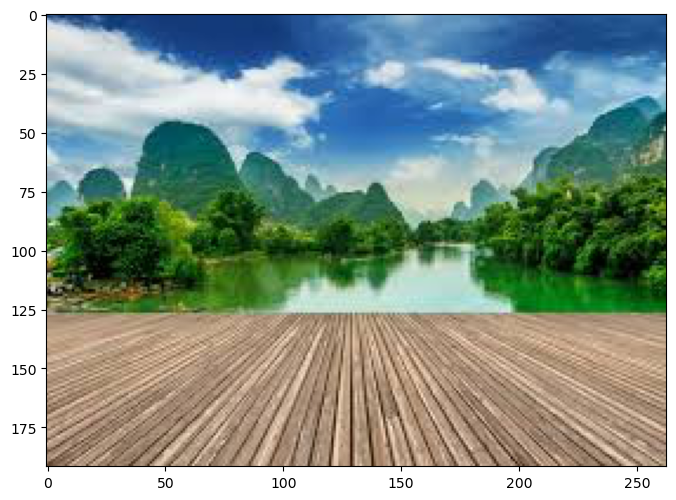

In [5]:
image = plt.imread('image_1.jpeg')
print(image.shape)
plt.figure(figsize=(8,8))
plt.imshow(image)

(192, 263)


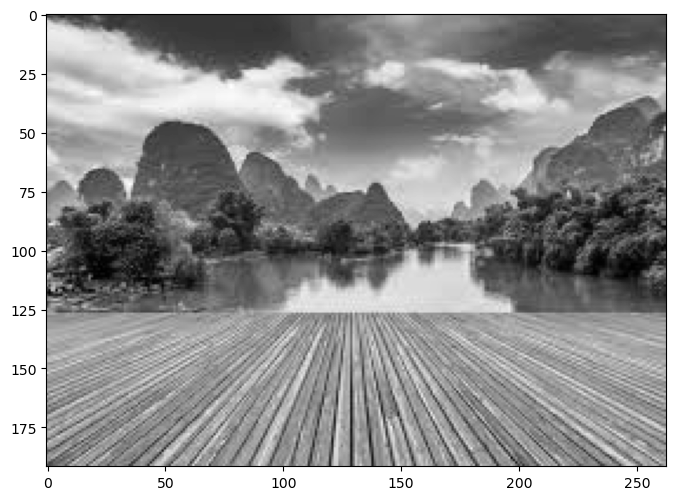

In [37]:
gray = rgb2gray(image)
print(gray.shape)
plt.figure(figsize=(8,8))
plt.imshow(gray, cmap='gray')

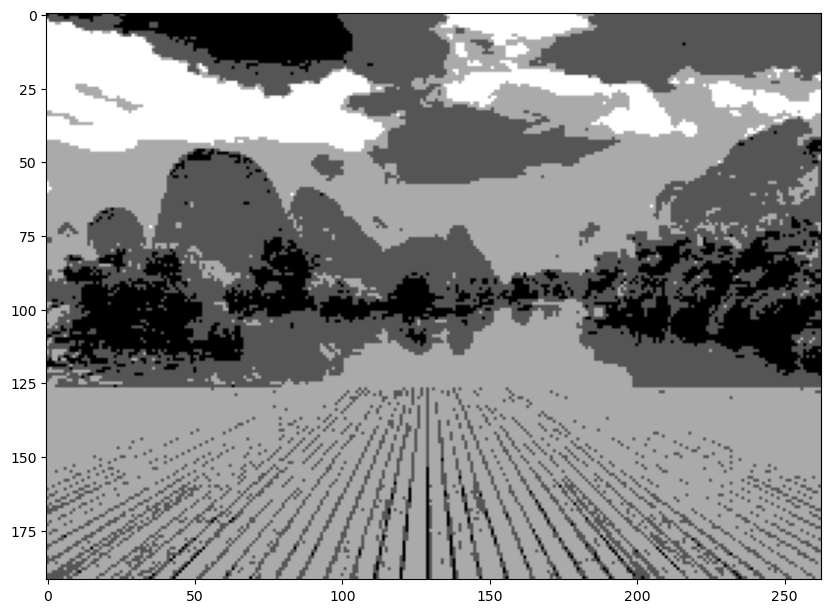

In [40]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray_r = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.figure(figsize=(10,10))
plt.imshow(gray_r, cmap='gray')

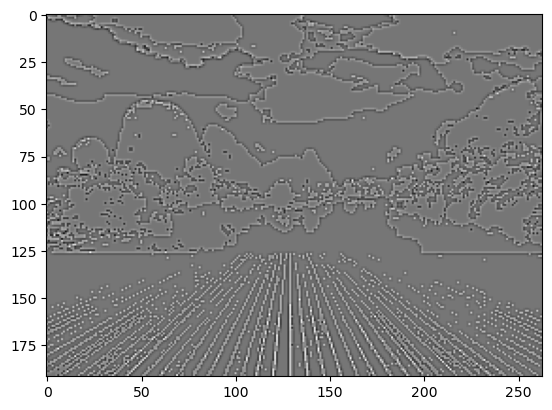

In [43]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
out_l = ndimage.convolve(gray_r, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [44]:
pic = image/255
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

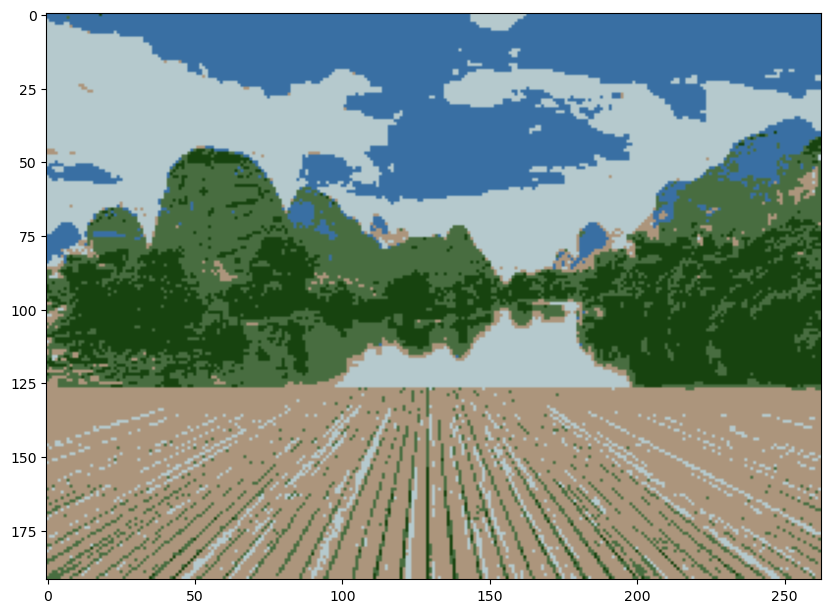

In [49]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.figure(figsize=(10,10))
plt.imshow(cluster_pic)